In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
print('hello')

hello


In [5]:
sample=mnist.train.images[2].reshape(28,28)

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

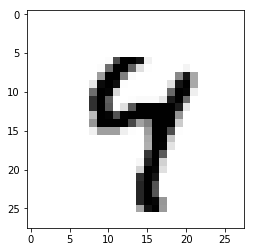

In [8]:
plt.imshow(sample,cmap='Greys')

In [9]:
learning_rate = 0.01
training_epochs= 15 
batch_size=100

In [10]:
n_class= 10
n_input=784
n_samples=mnist.train.num_examples
n_hidden_1=256
n_hidden_2=256

In [11]:
def multilayer_perceptron(x,weights,bias):
    
    layer1= tf.add(tf.matmul(x,weights['h1']),bias['b1'])
    layer1= tf.nn.relu(layer1)
    
    layer2= tf.add(tf.matmul(layer1,weights['h2']),bias['b2'])
    layer2= tf.nn.relu(layer2)
    
    out_layer = tf.matmul(layer2,weights['out'])+bias['out']
    
    return out_layer

In [12]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_class]))
}

In [13]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_class]))
}

In [14]:
x= tf.placeholder('float',[None,n_input])

In [15]:
y=tf.placeholder('float',[None,n_class])

In [16]:
pred= multilayer_perceptron(x,weights,biases)

In [17]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
t=mnist.train.next_batch(1)

In [29]:
v= mnist.train.next_batch(10)

In [31]:
v[0].shape

(10, 784)

In [32]:
v[1].shape

(10, 10)

In [19]:
t[0].shape

(1, 784)

In [20]:
t[1].shape

(1, 10)

In [21]:
xsamp,ysamp=t

In [26]:
xsamp.shape

(1, 784)

In [22]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

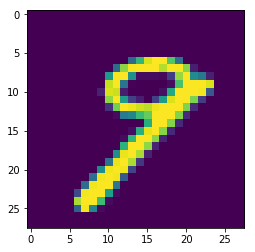

In [23]:
plt.imshow(xsamp.reshape(28,28))

In [36]:
# Launch the session
sess = tf.InteractiveSession()
init= tf.initialize_all_variables()
# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=49.5651
Epoch: 2 cost=9.3924
Epoch: 3 cost=5.1064
Epoch: 4 cost=3.5094
Epoch: 5 cost=2.8071
Epoch: 6 cost=2.2637
Epoch: 7 cost=2.0575
Epoch: 8 cost=2.0955
Epoch: 9 cost=1.6052
Epoch: 10 cost=1.5405
Epoch: 11 cost=1.2418
Epoch: 12 cost=1.1429
Epoch: 13 cost=1.1191
Epoch: 14 cost=0.9799
Epoch: 15 cost=0.9236
Model has completed 15 Epochs of Training


In [ ]:
tf.argmax()